# ANN Multi Output Multi Category Classification


In [1]:
# Imports
import numpy as np

import torch
import torch.nn as nn

# Pytorch Gpu Configuration
import torch_directml
device = torch_directml.device()
torch.set_default_device(device)



import matplotlib.pyplot as plt

# Matplotlib svg plots for better pictures
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

import seaborn as sns

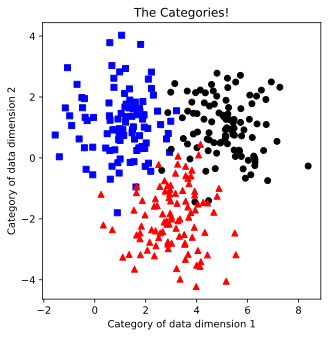

In [2]:
# Create the data
nPerCluster = 100
blur = 1  # Std Deviation of 1

A = [  1,  1 ]
B = [  5,  1 ]
C = [  3, -2 ]


# Generate the data
a = [
    A[0] + np.random.randn(nPerCluster) * blur,
    A[1] + np.random.randn(nPerCluster) * blur,
]
b = [
    B[0] + np.random.randn(nPerCluster) * blur,
    B[1] + np.random.randn(nPerCluster) * blur,
]
c = [
    C[0] + np.random.randn(nPerCluster) * blur,
    C[1] + np.random.randn(nPerCluster) * blur,
]

# True labels
labels_np = np.vstack(
    (
        np.zeros((nPerCluster, 1)),
        np.ones((nPerCluster, 1)),
        np.full((nPerCluster, 1), 2),
    )
)
# Stack it into a matrix
data_np = np.hstack((a, b, c)).T

# Convert np matrix into a tensor
data = torch.tensor(data_np).float()
labels = torch.squeeze(torch.tensor(labels_np).long())

# Plot the data
fig = plt.figure(figsize=(5, 5))
plt.plot(
    data[np.where(labels.cpu() == 0)[0], 0].cpu(),
    data[np.where(labels.cpu() == 0)[0], 1].cpu(),
    "bs",
)
plt.plot(
    data[np.where(labels.cpu() == 1)[0], 0].cpu(),
    data[np.where(labels.cpu() == 1)[0], 1].cpu(),
    "ko",
)
plt.plot(
    data[np.where(labels.cpu() == 2)[0], 0].cpu(),
    data[np.where(labels.cpu() == 2)[0], 1].cpu(),
    "r^",
)
plt.title("The Categories!")
plt.xlabel("Category of data dimension 1")
plt.ylabel("Category of data dimension 2")
plt.show()

In [3]:
# Create ANN model
def nn_model(lr):
    # Model Architecture
    ANN_model = nn.Sequential(
        nn.Linear(2, 128),
        nn.ReLU(),
        nn.Linear(128, 512),
        nn.ReLU(),
        nn.Linear(512, 64),
        nn.ReLU(),
        nn.Linear(64, 64),
        nn.ReLU(),
        nn.Linear(64, 3),
        nn.Softmax(dim=1),
    )

    # Loss Function
    loss_fun = nn.CrossEntropyLoss()  # This has softmax built in
    # Optimizer
    optimizer = torch.optim.SGD(ANN_model.parameters(), lr=lr)
    # test the model
    yHat = ANN_model(data)

    print(data.shape)
    print(yHat.shape)
    print(labels.shape)
    print(loss_fun(yHat, labels))
    return ANN_model, loss_fun, optimizer

In [4]:
# Train the model
def train_the_model(model, loss_fun, optimizer, n_epoches, labels, data):

    # Initialization of losses and onGoingAccuracy
    losses = torch.zeros(n_epoches)
    on_going_acc = []

    # The Loop
    for epoch in range(n_epoches):

        # Forward Pass
        yHat = model(data)

        # Compute Loss
        loss = loss_fun(yHat, labels)
        losses[epoch] = loss

        # Backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Compute the accuracy
        matches = torch.argmax(yHat, axis=1) == labels  # Returns boolean
        matches_numeric = matches.float()
        accuracy_epoch = 100 * torch.mean(matches_numeric)
        on_going_acc.append(accuracy_epoch.cpu().detach())

    # Predictions
    predictions = model(data)

    pred_labels = torch.argmax(predictions, axis=1)
    total_acc = 100 * torch.mean((pred_labels == labels).float())
    return losses, total_acc, on_going_acc, yHat

In [5]:
learning_rate = 0.1
n_epoches = 1000
ANN_model, loss_fun, optimizer = nn_model(lr=learning_rate)
losses, total_acc, on_going_acc, yHat = train_the_model(
    ANN_model, loss_fun, optimizer, n_epoches, labels, data
)
print(f"Final Accuracy: {total_acc}")

torch.Size([300, 2])
torch.Size([300, 3])
torch.Size([300])
tensor(1.1043, device='privateuseone:0', grad_fn=<NllLossBackward0>)


/home/kumar/anaconda3/envs/dml/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: The operator 'aten::_foreach_add_.List' is not currently supported on the DML backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at /__w/1/s/pytorch-directml-plugin/torch_directml/csrc/dml/dml_cpu_fallback.cpp:15.)
  return func(*args, **kwargs)


Final Accuracy: 96.33333587646484


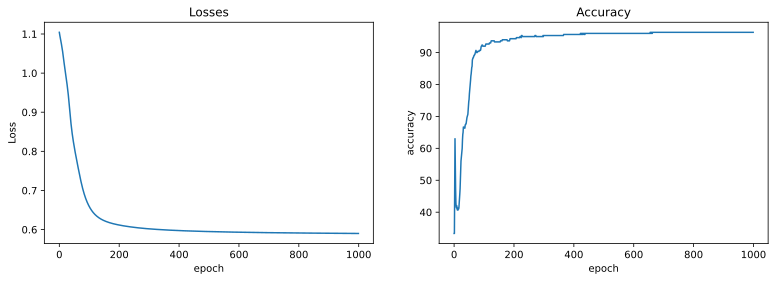

In [10]:
# Result Visualization

fig,ax = plt.subplots(1,2,figsize=(13,4))

ax[0].plot(losses.cpu().detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('epoch')
ax[0].set_title('Losses')

ax[1].plot(on_going_acc)
ax[1].set_ylabel('accuracy')
ax[1].set_xlabel('epoch')
ax[1].set_title('Accuracy')
plt.show()

In [11]:
# confirm that all model predictions sum to 1
torch.sum(yHat,axis=1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 

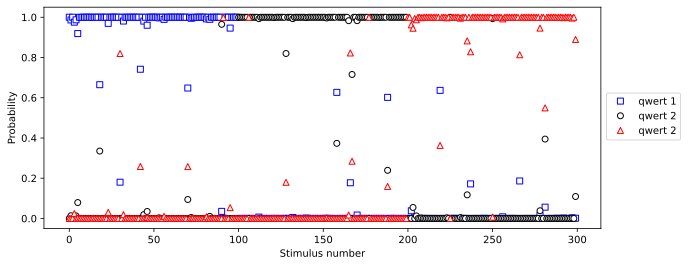

In [13]:
# plot the raw model outputs

fig = plt.figure(figsize=(10,4))

colorshape = [  'bs','ko','r^' ]
for i in range(3):
  plt.plot(yHat[:,i].cpu().detach(),colorshape[i],markerfacecolor='w')

plt.xlabel('Stimulus number')
plt.ylabel('Probability')
plt.legend(['qwert 1','qwert 2','qwert 2'],loc=(1.01,.4))
plt.show()